In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        os.path.join(dirname, filename)
            
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [5]:
train_df = pd.read_csv('../input/petfinder-pawpularity-score/train.csv')
train_df

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0 to 9911
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             9912 non-null   object
 1   Subject Focus  9912 non-null   int64 
 2   Eyes           9912 non-null   int64 
 3   Face           9912 non-null   int64 
 4   Near           9912 non-null   int64 
 5   Action         9912 non-null   int64 
 6   Accessory      9912 non-null   int64 
 7   Group          9912 non-null   int64 
 8   Collage        9912 non-null   int64 
 9   Human          9912 non-null   int64 
 10  Occlusion      9912 non-null   int64 
 11  Info           9912 non-null   int64 
 12  Blur           9912 non-null   int64 
 13  Pawpularity    9912 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 1.1+ MB


In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Subject Focus,9912.0,0.027643,0.163957,0.0,0.0,0.0,0.0,1.0
Eyes,9912.0,0.772599,0.419175,0.0,1.0,1.0,1.0,1.0
Face,9912.0,0.903955,0.294668,0.0,1.0,1.0,1.0,1.0
Near,9912.0,0.861582,0.345356,0.0,1.0,1.0,1.0,1.0
Action,9912.0,0.009988,0.099444,0.0,0.0,0.0,0.0,1.0
Accessory,9912.0,0.067797,0.251409,0.0,0.0,0.0,0.0,1.0
Group,9912.0,0.129338,0.335591,0.0,0.0,0.0,0.0,1.0
Collage,9912.0,0.049637,0.217204,0.0,0.0,0.0,0.0,1.0
Human,9912.0,0.166263,0.372335,0.0,0.0,0.0,0.0,1.0
Occlusion,9912.0,0.172014,0.377411,0.0,0.0,0.0,0.0,1.0


In [6]:
train_df.median()

Subject Focus     0.0
Eyes              1.0
Face              1.0
Near              1.0
Action            0.0
Accessory         0.0
Group             0.0
Collage           0.0
Human             0.0
Occlusion         0.0
Info              0.0
Blur              0.0
Pawpularity      33.0
dtype: float64

In [7]:
test_df = pd.read_csv('../input/petfinder-pawpularity-score/test.csv')
test_df


,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,4128bae22183829d2b5fea10effdb0c3,1,0,1,0,0,1,1,0,0,1,0,1
1,43a2262d7738e3d420d453815151079e,0,1,0,0,0,0,1,1,0,0,0,0
2,4e429cead1848a298432a0acad014c9d,0,0,0,1,0,1,1,1,0,1,1,1
3,80bc3ccafcc51b66303c2c263aa38486,1,0,1,0,0,0,0,0,0,0,1,0
4,8f49844c382931444e68dffbe20228f4,1,1,1,0,1,1,0,1,0,1,1,0
5,b03f7041962238a7c9d6537e22f9b017,0,0,1,1,1,1,1,1,1,0,1,0
6,c978013571258ed6d4637f6e8cc9d6a3,1,0,0,0,1,1,0,1,0,1,1,1
7,e0de453c1bffc20c22b072b34b54e50f,1,0,1,0,0,0,0,0,1,0,0,1


In [8]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Subject Focus,8.0,0.625,0.517549,0.0,0.0,1.0,1.00,1.0
Eyes,8.0,0.250,0.462910,0.0,0.0,0.0,0.25,1.0
Face,8.0,0.625,0.517549,0.0,0.0,1.0,1.00,1.0
Near,8.0,0.250,0.462910,0.0,0.0,0.0,0.25,1.0
Action,8.0,0.375,0.517549,0.0,0.0,0.0,1.00,1.0
Accessory,8.0,0.625,0.517549,0.0,0.0,1.0,1.00,1.0
Group,8.0,0.500,0.534522,0.0,0.0,0.5,1.00,1.0
Collage,8.0,0.625,0.517549,0.0,0.0,1.0,1.00,1.0
Human,8.0,0.250,0.462910,0.0,0.0,0.0,0.25,1.0
Occlusion,8.0,0.500,0.534522,0.0,0.0,0.5,1.00,1.0


In [9]:
test_df.median()

Subject Focus    1.0
Eyes             0.0
Face             1.0
Near             0.0
Action           0.0
Accessory        1.0
Group            0.5
Collage          1.0
Human            0.0
Occlusion        0.5
Info             1.0
Blur             0.5
dtype: float64

In [10]:
train_df.isnull().sum().sort_values(ascending=False)/train_df.shape[0]


Id               0.0
Subject Focus    0.0
Eyes             0.0
Face             0.0
Near             0.0
Action           0.0
Accessory        0.0
Group            0.0
Collage          0.0
Human            0.0
Occlusion        0.0
Info             0.0
Blur             0.0
Pawpularity      0.0
dtype: float64

In [2]:
import plotly 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

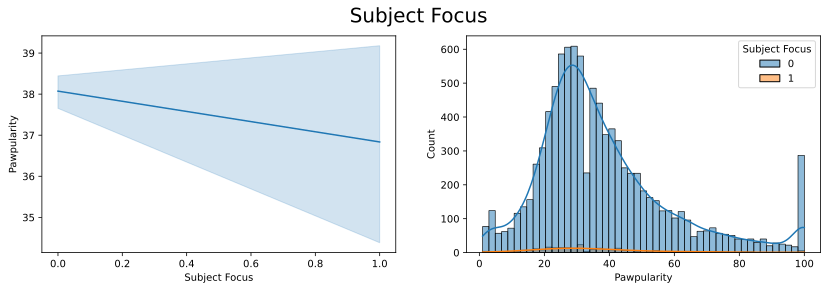

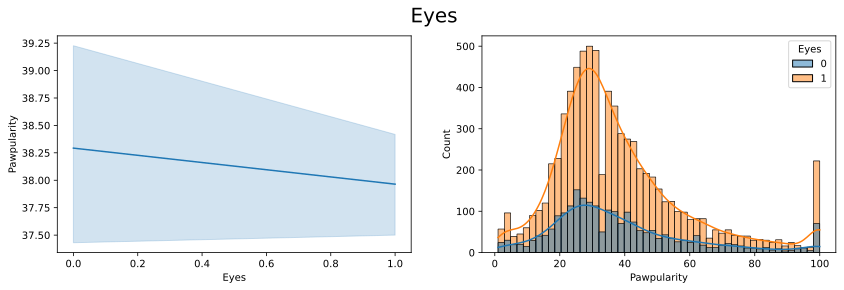

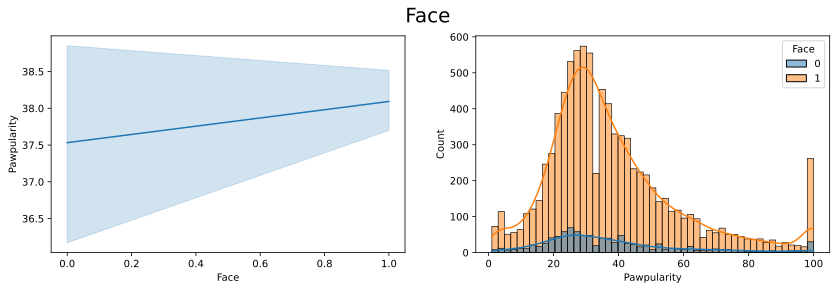

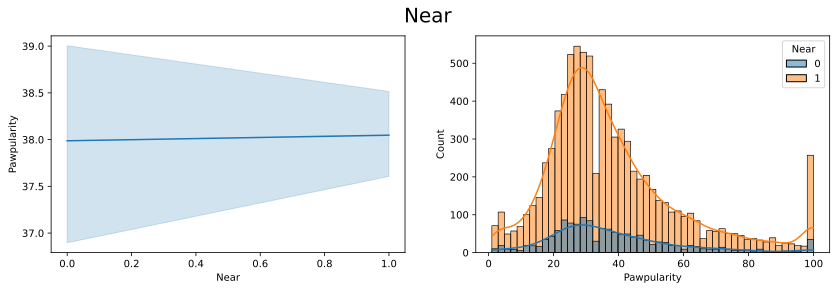

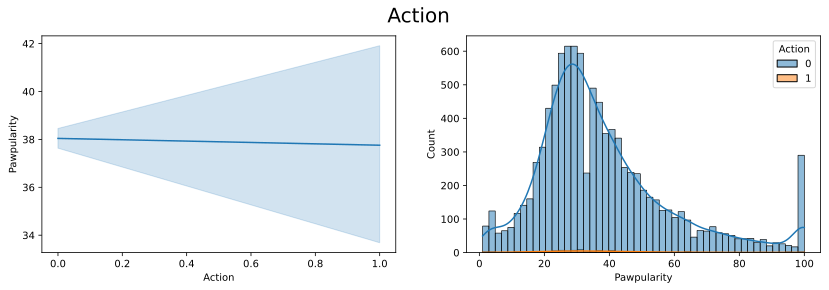

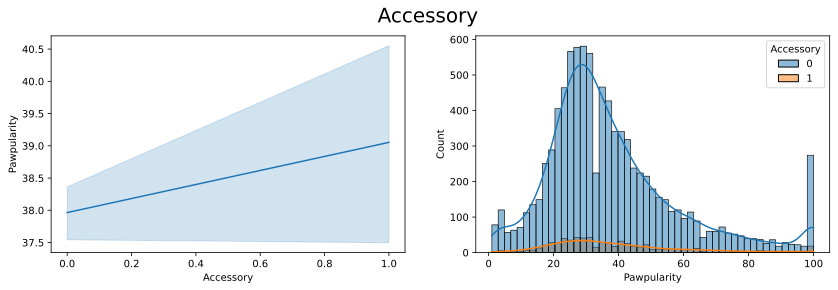

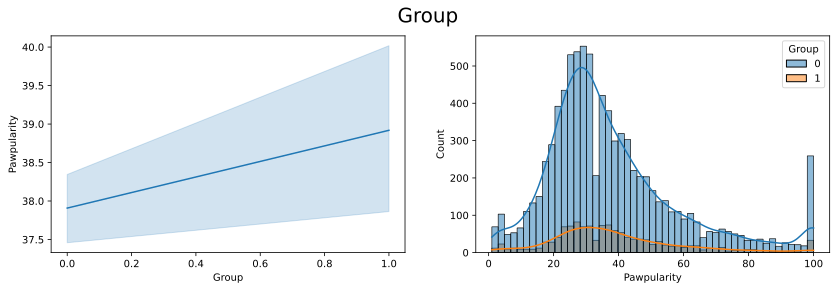

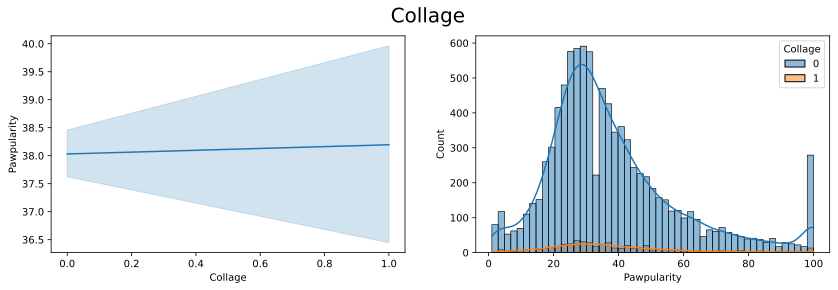

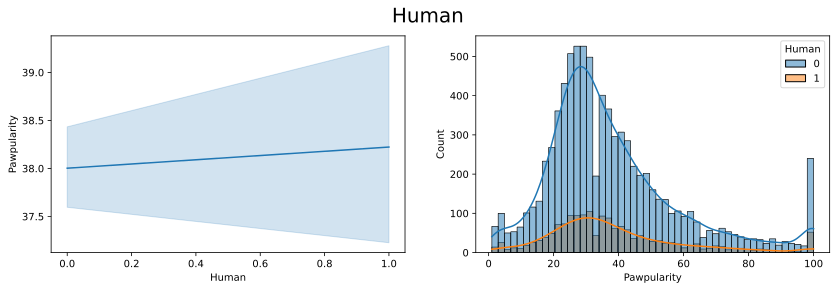

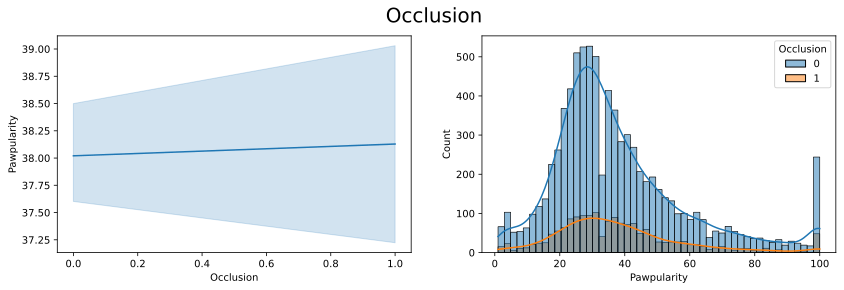

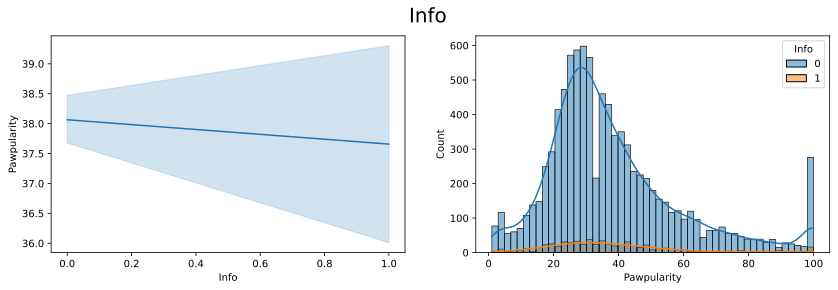

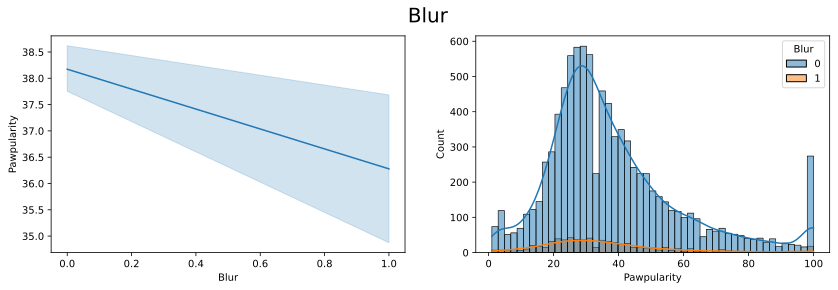

In [12]:
col_var = train_df.columns[1:-1].values.tolist()

for i in col_var:
    fig, ax = plt.subplots(1,2, figsize=(14,4))
    sns.lineplot(data=train_df, x=i, y='Pawpularity', ax=ax[0])
    sns.histplot(data=train_df, x='Pawpularity', hue=i, kde=True, ax=ax[1])
    plt.suptitle(i, fontsize=20)
    fig.show()

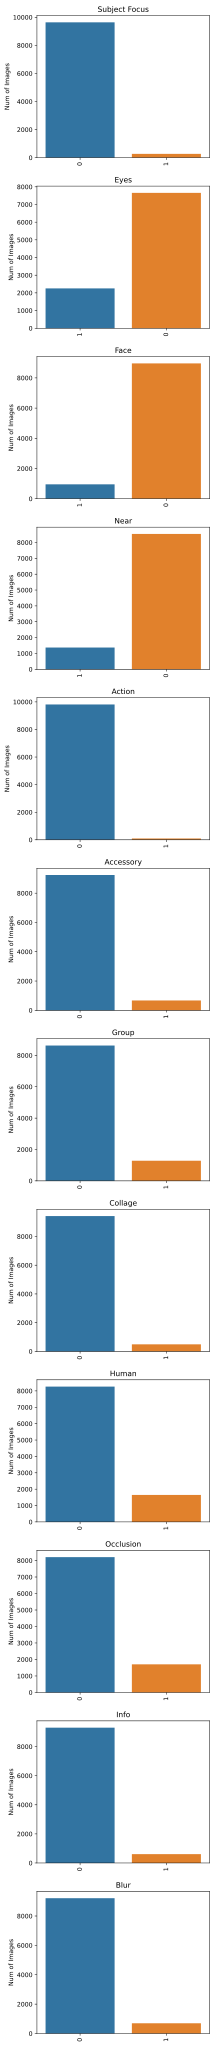

In [13]:
# Obtain headers.
headers = train_df.dtypes.index

# Not all of these are categorical variables.  
# We need categorical headers and continuous headers, with two different types of plots.

# Categorical headers of features.
cat_headers = ['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']

# Plot paretos of top 10 values in each column.
fig, ax = plt.subplots(len(cat_headers[0:]), 1, figsize=(5, len(cat_headers)*5))
for i, column in enumerate(cat_headers[0:]):
    to_plot=train_df[column].value_counts().head(10)
    plot=sns.barplot(x=to_plot.index, y=to_plot, ax=ax[i])
    plot.set_xticklabels(to_plot.index, rotation=90)
    plot.set_title(column)
    plot.set_ylabel("Num of Images")
fig.show()

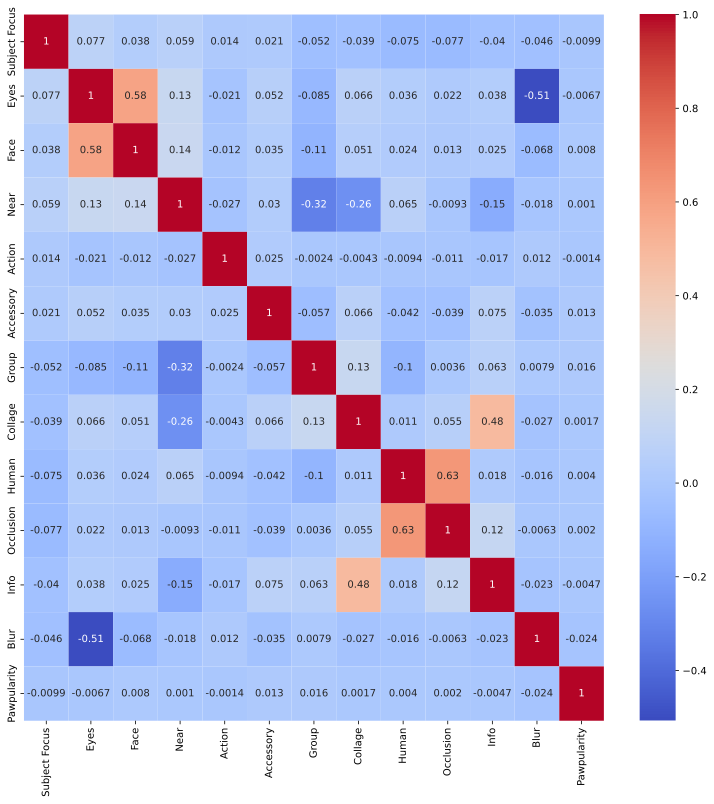

In [14]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(13,13)) 
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.show()


<AxesSubplot:>

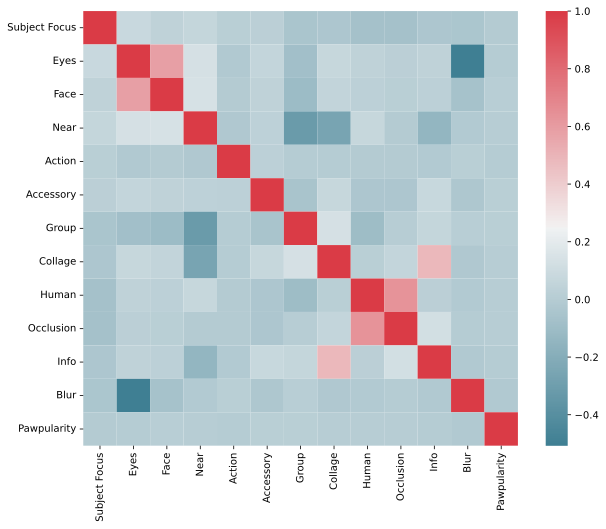

In [15]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10, 8))
corr = train_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Creating the Correlation matrix 

In [16]:
cor_matrix = train_df.corr().abs()
print(cor_matrix)

               Subject Focus      Eyes      Face      Near    Action  \
Subject Focus       1.000000  0.076794  0.038252  0.058672  0.014006   
Eyes                0.076794  1.000000  0.584484  0.133127  0.020544   
Face                0.038252  0.584484  1.000000  0.139031  0.012022   
Near                0.058672  0.133127  0.139031  1.000000  0.027312   
Action              0.014006  0.020544  0.012022  0.027312  1.000000   
Accessory           0.020619  0.052480  0.034788  0.030234  0.025377   
Group               0.052150  0.084975  0.108022  0.319107  0.002432   
Collage             0.038534  0.066361  0.050847  0.263498  0.004270   
Human               0.075295  0.036046  0.024170  0.065215  0.009429   
Occlusion           0.076851  0.022143  0.013389  0.009287  0.010832   
Info                0.040498  0.038179  0.024704  0.146188  0.017191   
Blur                0.046407  0.507323  0.068198  0.017566  0.012009   
Pawpularity         0.009853  0.006686  0.008018  0.001001  0.00

In [17]:
train_df.corr()


,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
Subject Focus,1.000000,0.076794,0.038252,0.058672,0.014006,0.020619,-0.052150,-0.038534,-0.075295,-0.076851,-0.040498,-0.046407,-0.009853
Eyes,0.076794,1.000000,0.584484,0.133127,-0.020544,0.052480,-0.084975,0.066361,0.036046,0.022143,0.038179,-0.507323,-0.006686
Face,0.038252,0.584484,1.000000,0.139031,-0.012022,0.034788,-0.108022,0.050847,0.024170,0.013389,0.024704,-0.068198,0.008018
Near,0.058672,0.133127,0.139031,1.000000,-0.027312,0.030234,-0.319107,-0.263498,0.065215,-0.009287,-0.146188,-0.017566,0.001001
Action,0.014006,-0.020544,-0.012022,-0.027312,1.000000,0.025377,-0.002432,-0.004270,-0.009429,-0.010832,-0.017191,0.012009,-0.001373
Accessory,0.020619,0.052480,0.034788,0.030234,0.025377,1.000000,-0.057301,0.065860,-0.041745,-0.038912,0.075063,-0.035012,0.013287
Group,-0.052150,-0.084975,-0.108022,-0.319107,-0.002432,-0.057301,1.000000,0.132007,-0.104287,0.003568,0.063311,0.007899,0.016469
Collage,-0.038534,0.066361,0.050847,-0.263498,-0.004270,0.065860,0.132007,1.000000,0.011476,0.054611,0.482141,-0.026591,0.001732
Human,-0.075295,0.036046,0.024170,0.065215,-0.009429,-0.041745,-0.104287,0.011476,1.000000,0.634381,0.018171,-0.015941,0.003983
Occlusion,-0.076851,0.022143,0.013389,-0.009287,-0.010832,-0.038912,0.003568,0.054611,0.634381,1.000000,0.117725,-0.006338,0.001979


<AxesSubplot:>

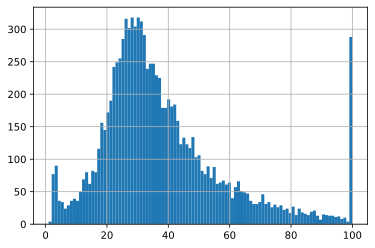

In [18]:
train_df['Pawpularity'].hist(bins=100)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

RMSE 

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from 

In [20]:
classifiers=[KNeighborsRegressor(10),
            RandomForestRegressor(n_estimators=200,max_depth=5,random_state=42),
            GradientBoostingRegressor(n_estimators=200,max_depth=5,random_state=42)]
rmse_dict={}


In [10]:
log_cols=['Algoritm','RMSE']
log=pd.DataFrame(columns=log_cols)
X_train, X_test, Y_train, Y_test = train_test_split(train_df.drop(['Id', 'Pawpularity'], axis=1),
                                                    train_df['Pawpularity'],
                                                    test_size=0.2,
                                                    random_state=42)


In [11]:
for clf in classifiers:
    name=clf.__class__.__name__
    model_fit= clf.fit(X_train,Y_train)
    prediction=clf.predict(X_test)
    predictions = prediction.astype(int)
   
   
    rmse=mean_squared_error(Y_test,predictions,squared=False)
    print(clf,rmse)
    if name in rmse_dict:
        rmse_dict[name]+=rmse
    else:
        rmse_dict[name]=rmse


KNeighborsRegressor(n_neighbors=10) 21.70788971886476
RandomForestRegressor(max_depth=5, n_estimators=200, random_state=42) 21.02072555057789
GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42) 21.194438799035265


In [12]:
#accuracy
classifiers=[KNeighborsRegressor(10),
            RandomForestRegressor(n_estimators=200,max_depth=5,random_state=42),
            GradientBoostingRegressor(n_estimators=200,max_depth=5,random_state=42)]
acc_dict={}


In [13]:
log_cols=['Algoritm','Accuracy']
log=pd.DataFrame(columns=log_cols)
X_train, X_test, Y_train, Y_test = train_test_split(train_df.drop(['Id', 'Pawpularity'], axis=1),
                                                    train_df['Pawpularity'],
                                                    test_size=0.2,
                                                    random_state=42)

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
for clf in classifiers:
    name=clf.__class__.__name__
    model_fit= clf.fit(X_train,Y_train)
    prediction=clf.predict(X_test)
    predictions = prediction.astype(int)
   
   
    acc=accuracy_score(Y_test,predictions)
    print(clf,acc)
    if name in acc_dict:
        acc_dict[name]+=acc
    else:
        acc_dict[name]=acc

KNeighborsRegressor(n_neighbors=10) 0.025718608169440244
RandomForestRegressor(max_depth=5, n_estimators=200, random_state=42) 0.02168431669188099
GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42) 0.02118003025718608


Random Forest + Grind Search cv


In [28]:
X = train_df[train_df.columns[1:-1]]
y = train_df['Pawpularity']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.3, random_state=42)

In [30]:
from sklearn.ensemble import RandomForestRegressor

RFreg = RandomForestRegressor(random_state=42)
RFreg_params = {'max_features': ['sqrt', 'log2'],
                'max_depth': [5, 6, 7],
                'bootstrap': [True, False],
                'warm_start': [True, False],
                'oob_score': [True, False]}

RFreg_GS = GridSearchCV(RFreg,
                        RFreg_params,
                        scoring = ["r2", "neg_mean_absolute_error"],
                        refit = "r2",
                        cv = 5,
                        n_jobs = -1,
                        verbose=3)

RFreg_GS.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, oob_score=True, warm_start=True; neg_mean_absolute_error: (test=-14.871) r2: (test=-0.003) total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=sqrt, oob_score=True, warm_start=False; neg_mean_absolute_error: (test=-15.163) r2: (test=-0.000) total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, oob_score=False, warm_start=True; neg_mean_absolute_error: (test=-15.156) r2: (test=-0.004) total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, oob_score=False, warm_start=True; neg_mean_absolute_error: (test=-14.871) r2: (test=-0.003) total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=sqrt, oob_score=False, warm_start=False; neg_mean_absolute_error: (test=-15.163) r2: (test=-0.000) total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=log2, oob_score=True, w

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'oob_score': [True, False],
                         'warm_start': [True, False]},
             refit='r2', scoring=['r2', 'neg_mean_absolute_error'], verbose=3)

In [31]:
print(RFreg_GS.best_params_)
print(RFreg_GS.best_score_)

{'bootstrap': False, 'max_depth': 5, 'max_features': 'sqrt', 'oob_score': False, 'warm_start': True}
-0.0017657271100173454


In [32]:
model_pred = RFreg_GS.predict(X_test)
predictions = model_pred.astype(int)
RFreg_r2 = r2_score(y_test, model_pred)
RFreg_r2

-0.0017640342469860126

In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))


0.019502353732347006


GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier()
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
model.fit(X_train,y_train)

predictionforest = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
print(accuracy_score(y_test,predictionforest))

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

print('Logistic Model Accuracy : ', log_model.score(X_test, y_test)*100, '%')

prediction = log_model.predict(X_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Logistic Model Accuracy :  2.6899798251513114 %

Confusion matrix :
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00        18
          12       0.00      0.00      0.00        24
          13       0.00      0.00      0.00        21
          14       0.00      0.

In [41]:
# Decision Tree classification

from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(X_train, y_train)

print('Decision Tree Model Accuracy : ', decision_model.score(X_test, y_test)*100, '%')

prediction = decision_model.predict(X_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))


Decision Tree Model Accuracy :  2.9589778076664426 %

Confusion matrix :
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]

Classification report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00        18
          12       0.00      0.00      0.00        24
          13       0.06      0.05      0.05        21
          14       0.00   